In [1]:
import cv2
import numpy as np
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
import os


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
import os


train_data_dir='Downloads/archive/train'
validation_data_dir='Downloads/archive/test'


train_datagen = ImageDataGenerator(
					rescale=1./255,
					rotation_range=30,
					shear_range=0.3,
					zoom_range=0.3,
					horizontal_flip=True,
					fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
					train_data_dir,
					color_mode='grayscale',
					target_size=(48, 48),
					batch_size=32,
					class_mode='categorical',
					shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
							validation_data_dir,
							color_mode='grayscale',
							target_size=(48, 48),
							batch_size=32,
							class_mode='categorical',
							shuffle=True)


class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

img, label = train_generator.__next__()


model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))


model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())


train_path = "Downloads/archive/train"
test_path = "Downloads/archive/test"

num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)
    
num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)

print(num_train_imgs)
print(num_test_imgs)
epochs=30

history=model.fit(train_generator,
                steps_per_epoch=num_train_imgs//32,
                epochs=epochs,
                validation_data=validation_generator,
                validation_steps=num_test_imgs//32)

model.save('model_file.keras')


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 44, 44, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 20, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,489,095 (9.50 MB)

 Trainable params: 2,489,095 (9.50 MB)

 Non-trainable params: 0 (0.00 B)

None
28709
7178
Epoch 1/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 316s 339ms/step - accuracy: 0.2449 - loss: 1.8054 - val_accuracy: 0.3234 - val_loss: 1.6766
Epoch 2/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 44s 49ms/step - accuracy: 0.2500 - loss: 1.7629 - val_accuracy: 0.3225 - val_loss: 1.6797
Epoch 3/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 853s 951ms/step - accuracy: 0.3172 - loss: 1.6982 - val_accuracy: 0.4284 - val_loss: 1.4947
Epoch 4/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.4688 - loss: 1.4924 - val_accuracy: 0.4258 - val_loss: 1.5006
Epoch 5/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 984s 1s/step - accuracy: 0.3827 - loss: 1.5703 - val_accuracy: 0.4524 - val_loss: 1.3899
Epoch 6/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.3125 - loss: 1.4849 - val_accuracy: 0.4566 - val_loss: 1.3828
Epoch 7/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 301s 336ms/step - accuracy: 0.4325 - loss: 1.4648 - val_accuracy: 0.5033 - val_loss: 1.3101
Epoch 8/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.4

In [5]:
import cv2
import numpy as np
from keras.models import load_model

model=load_model('model_file.keras')

video=cv2.VideoCapture(0)

faceDetect=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

labels_dict={0:'Angry',1:'Disgust', 2:'Fear', 3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

while True:
    ret,frame=video.read()
    gray=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces= faceDetect.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    for x,y,w,h in faces:
        sub_face_img=gray[y:y+h, x:x+w]
        resized=cv2.resize(sub_face_img,(48,48))
        normalize=resized/255.0
        reshaped=np.reshape(normalize, (1, 48, 48, 1))
        result=model.predict(reshaped)
        label=np.argmax(result, axis=1)[0]
        print(label)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255), 1)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(50,50,255),2)
        cv2.rectangle(frame,(x,y-40),(x+w,y),(50,50,255),-1)
        cv2.putText(frame, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
    cv2.imshow("Frame",frame)
    k=cv2.waitKey(1)
    if k==ord('q'):
        break

video.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
4


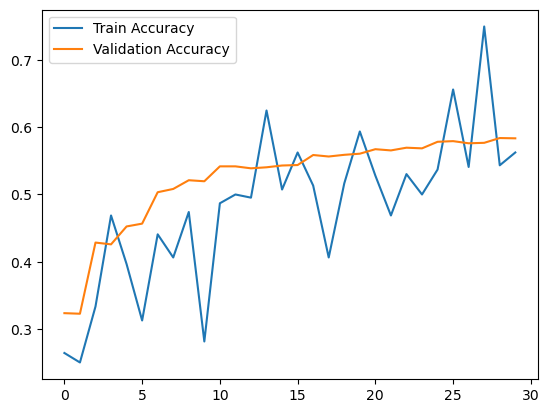

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()
